In [1]:
!wget https://mirror.coggle.club/dataset/afqmc_public.zip
!unzip afqmc_public.zip -d afqmc_public

'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
'unzip' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


# 数据处理

In [1]:
import os, json, codecs
import pandas as pd
import numpy as np
import jieba, gensim
%pylab inline
import seaborn as sbs

train_json = codecs.open('train.json',encoding='UTF-8').readlines()
train_json = [json.loads(x) for x in train_json]

dev_json = codecs.open('dev.json', encoding='UTF-8').readlines()
dev_json = [json.loads(x) for x in dev_json]

train_data = pd.DataFrame(train_json + dev_json)
train_data

Populating the interactive namespace from numpy and matplotlib


,sentence1,sentence2,label
0,蚂蚁借呗等额还款可以换成先息后本吗,借呗有先息到期还本吗,0
1,蚂蚁花呗说我违约一次,蚂蚁花呗违约行为是什么,0
2,帮我看一下本月花呗账单有没有结清,下月花呗账单,0
3,蚂蚁借呗多长时间综合评估一次,借呗得评估多久,0
4,我的花呗账单是***，还款怎么是***,我的花呗，月结出来说让我还***元，我自己算了一下详细名单我应该还***元,1
...,...,...,...
38645,使用的借呗之后，可以出国吗，因为我的工作在国外，我需要在国外还款,借呗这个月分期还款了，还了的钱还可以再次取出用吗,0
38646,还要多久能开通花呗,花呗要多久才会重新开通,0
38647,怎样设置花呗访问手机通讯录,花呗读取不了手机通讯录权限,0
38648,花呗的学历填错了，可不可以改,花呗学历填错了怎样修改,0


In [12]:
test_json = codecs.open('test.json',encoding='UTF-8').readlines()

In [2]:
#用中文分词器jieba进行分词
train_sentence1 = train_data['sentence1'].apply(lambda x: list(jieba.cut(x.replace('*', ''))))
train_sentence2 = train_data['sentence2'].apply(lambda x: list(jieba.cut(x.replace('*', ''))))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ASUS\AppData\Local\Temp\jieba.cache
Loading model cost 0.413 seconds.
Prefix dict has been built successfully.


In [3]:
train_sentence1[0]

['蚂蚁', '借', '呗', '等额', '还款', '可以', '换成', '先息', '后', '本', '吗']

# 训练Word2Vec

In [4]:
model = gensim.models.Word2Vec(sentences=train_sentence1 + train_sentence2, 
                                   vector_size=64, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [5]:
model.wv.most_similar('蚂蚁')

[('借', 0.733397364616394),
 ('借钱', 0.683042049407959),
 ('借款', 0.6616242527961731),
 ('变短', 0.636046826839447),
 ('按期', 0.5995596647262573),
 ('短期', 0.5979361534118652),
 ('停止', 0.5512950420379639),
 ('算法', 0.5478457808494568),
 ('循环', 0.5439417362213135),
 ('期限', 0.5430406332015991)]

In [21]:
model.wv.most_similar('填错')

[('填', 0.8731459975242615),
 ('资料', 0.8619234561920166),
 ('填写', 0.8515828847885132),
 ('初中', 0.8469220995903015),
 ('补全', 0.8360111713409424),
 ('完善', 0.8340798020362854),
 ('个人信息', 0.8328665494918823),
 ('补充', 0.8204361796379089),
 ('填花', 0.8181040287017822),
 ('学校', 0.8174989819526672)]

In [13]:
model.wv['客户']

array([-0.1479425 ,  0.24059713,  0.4252791 ,  0.18005963,  0.34318528,
        0.18816513,  0.19289975,  0.1124712 , -0.07303344,  0.5023007 ,
        0.644988  , -0.41127324, -0.23542324, -0.47795802,  0.23912965,
        0.07072049,  0.02502367,  0.06234297, -0.27765128,  0.27346027,
        0.27341026,  0.61132175,  0.33004767,  0.25791943, -0.55701774,
        0.2706564 ,  0.06601232,  0.6119729 ,  0.4641568 ,  0.0872625 ,
       -0.08522543,  0.28938767, -0.42989594,  0.43513003, -0.3597291 ,
       -0.1249689 ,  0.417866  ,  0.35276264,  0.482949  , -0.1801883 ,
       -0.2678838 ,  0.4821173 , -0.44115788, -0.03254813,  0.26651332,
       -0.1543451 , -0.3397984 , -0.17151444, -0.3384765 , -0.1220949 ,
        0.35129833, -0.10138208, -0.07077956,  0.4886721 ,  0.41465622,
        0.20652913,  0.29084554, -0.21121438, -0.4212703 ,  0.04925221,
       -0.42831022, -0.23431152,  0.45881152,  0.05300376,  0.6565195 ,
       -0.5878238 ,  0.25904518, -0.3788148 , -0.15227789,  0.18

# 序列编码

In [22]:
# 第一个样本的第一个句子
arr1 = np.vstack([model.wv[x] for x in train_sentence1[0]])

# 第一个样本的第二个句子
arr2 = np.vstack([model.wv[x] for x in train_sentence2[0]])

In [9]:
arr1.shape#11个词

(11, 64)

In [10]:
arr1.shape, arr2.shape

((11, 64), (7, 64))

In [31]:
def encode_sentence(sentence):
    arr = []
    for x in sentence:
        arr.append(model.wv[x])
        
    if len(arr) == 0:
        return np.zeros(shape=(1, 64))
    else:
        return np.vstack(arr)

In [32]:
#按句子取出每一个词的词向量
train_sentence1_feat = [ encode_sentence(x) for x in train_sentence1]
train_sentence2_feat = [ encode_sentence(x) for x in train_sentence2]

In [ ]:
#7个单词的词向量
encode_sentence(train_sentence2[0])

## mean-pooling

In [33]:
train_sentence1_meanfeat = np.vstack([x.mean(0) for x in train_sentence1_feat])
train_sentence2_meanfeat = np.vstack([x.mean(0) for x in train_sentence2_feat])

from sklearn.preprocessing import normalize
train_sentence1_meanfeat = normalize(train_sentence1_meanfeat)
train_sentence2_meanfeat = normalize(train_sentence2_meanfeat)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 100 and the array at index 18353 has size 64

In [ ]:
len(train_sentence1_meanfeat[1])

In [ ]:
#计算的是两个句子的相似度
np.dot(train_sentence1_meanfeat[0],train_sentence2_meanfeat[0])

In [ ]:
mean_pooing_distance = [np.dot(x, y) for x, y in 
                        zip(train_sentence1_meanfeat, train_sentence2_meanfeat)]

# 所有样本的 句子1 与 句子2 的mean-pooing的相似度
# 句子1 -》 100
# 句子2 -》 100
train_data['mean_pooing'] = mean_pooing_distance

In [17]:
train_data['mean_pooing']

0        0.868052
1        0.748734
2        0.738385
3        0.954894
4        0.842251
           ...   
38645    0.819596
38646    0.836809
38647    0.804293
38648    0.867659
38649    0.938982
Name: mean_pooing, Length: 38650, dtype: float64

In [ ]:
train_data.groupby('label')['mean_pooing'].mean().plot(kind='bar')

## max-pooling

In [29]:
train_sentence1_meanfeat = np.vstack([x.max(0) for x in train_sentence1_feat])
train_sentence2_meanfeat = np.vstack([x.max(0) for x in train_sentence2_feat])

from sklearn.preprocessing import normalize
train_sentence1_meanfeat = normalize(train_sentence1_meanfeat)
train_sentence2_meanfeat = normalize(train_sentence2_meanfeat)

max_pooing_distance = [np.dot(x, y) for x, y in 
                        zip(train_sentence1_meanfeat, train_sentence2_meanfeat)]
train_data['max_pooing'] = max_pooing_distance

NameError: name 'train_sentence1_feat' is not defined

In [ ]:
train_data.groupby('label')['max_pooing'].mean().plot(kind='bar')

## TFIDF Pooling

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100000)
tfidf.fit([' '.join(x) for x in train_sentence1 + train_sentence2])

TfidfVectorizer(max_features=100000)

In [11]:
#这是把两个句子集作为语料库来方便后续计算TF-IDF
[' '.join(x) for x in train_sentence1 + train_sentence2]

['蚂蚁 借 呗 等额 还款 可以 换成 先息 后 本 吗 借 呗 有 先息 到期 还本 吗',
 '蚂蚁 花 呗 说 我 违约 一次 蚂蚁 花 呗 违约 行为 是 什么',
 '帮 我 看 一下 本月 花 呗 账单 有没有 结清 下 月 花 呗 账单',
 '蚂蚁 借 呗 多长时间 综合 评估 一次 借 呗 得 评估 多久',
 '我 的 花 呗 账单 是 ， 还款 怎么 是 我 的 花 呗 ， 月 结出 来说 让 我 还 元 ， 我 自己 算了 一下 详细 名单 我 应该 还元',
 '蚂蚁 借 呗 的 额度 可以 从 申请 不 蚂蚁 借 呗 节假日 可以 借款 吗',
 '商家 怎么 开通 花 呗 支付 为什么 无法 开通 花 呗',
 '用花 呗 怎么 买 不了 车票 我 是 问用 蚂蚁 花 呗 ， 为什么 买 不了 火车票',
 '如 升级 为 网商贷 用户 而 借 呗 的 欠款 怎么 还 我 借 呗 已 还清 ， 为什么 升级 不了 网商贷',
 '花 呗 不 消费 有没有 年费 花 呗 不用 就 不会 产生 费用',
 '支付宝 系统 点 我 的 里面 没有 花 呗 这 一项 我 下载 支付宝 怎么 没有 花 呗 的',
 '用花 呗 淘宝 购物 ， 花 呗 已经 还清 了 ， 但是 东西 不 想要 申请 退款 了 ， 钱会 退 到哪去 在 淘宝 买 衣服 用花 呗 支付   然后 申请 退款 了   这笔 钱 退 到 哪里',
 '花 呗 标示 的 商品 花 呗 识别 的 商品',
 '花 呗 自动 从 余额 宝 扣款 ， 需要 我 自己 设置 吗 支付宝 余额 会 自动 还花 呗 吗',
 '花 呗 提前 结清 会 影响 使用 吗 我 的 花 呗 分期 不能 提前 结清',
 '花 呗 逾期 一天 怎么办 花 呗 逾期 一天 会 影响 芝麻 信用 吗',
 '花 呗 消费 超过 额度 有 什么 影响 吗 花 呗 额度 成 负数 有 啥 影响 吗',
 '还款 还清 了 ， 为什么 花 呗 账单 显示 还要 还款 花 呗 全额 还清 怎么 显示 没有 还款',
 '我 的 花 呗 背 限额 了 吗 花 呗 临时 额度 有 限额 吗',
 '花 呗 为什么 会 几个 月 没有 提升 额度 我 这个 支付宝 怎么 没有 花 呗 额度',
 '花 呗 一次

In [ ]:
tfidf.vocabulary_

In [ ]:
tfidf.idf_

In [ ]:
def tfidf_pooing(sentence, sentence_word2vec):
    weights = []
    feats = []
    for word,feat in zip(sentence, sentence_word2vec):
        if word in tfidf.vocabulary_:
            weights.append(tfidf.idf_[tfidf.vocabulary_[word]])
            feats.append(feat)
    weights = np.array(weights)
    feats = np.array(feats)
    
    if len(feats) == 0:
        return np.zeros(64)
    else:
        return np.matmul(weights, feats)

In [13]:
train_sentence1_tfidffeat = [tfidf_pooing(sentence, sentence_feat) 
    for sentence, sentence_feat in zip(train_sentence1[:], train_sentence1_feat[:])]

train_sentence2_tfidffeat = [tfidf_pooing(sentence, sentence_feat) 
    for sentence, sentence_feat in zip(train_sentence2[:], train_sentence2_feat[:])]


In [ ]:
from sklearn.preprocessing import normalize

train_sentence1_tfidffeat = np.vstack(train_sentence1_tfidffeat)
train_sentence2_tfidffeat = np.vstack(train_sentence2_tfidffeat)

train_sentence1_tfidffeat = normalize(train_sentence1_tfidffeat)
train_sentence2_tfidffeat = normalize(train_sentence2_tfidffeat)

tfidf_pooing_distance = [np.dot(x, y) for x, y in 
                        zip(train_sentence1_tfidffeat, train_sentence2_tfidffeat)]
train_data['tfidf_pooing'] = tfidf_pooing_distance

<AxesSubplot:xlabel='label'>

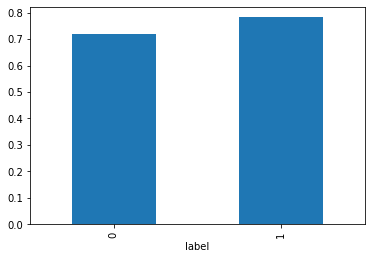

In [126]:
train_data.groupby('label')['tfidf_pooing'].mean().plot(kind='bar')

## SIF Embedding

> https://github.com/PrincetonML/SIF/blob/master/src/SIF_embedding.py

In [23]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1, n_iter=7, random_state=0)
svd.fit(train_sentence1_tfidffeat)

NameError: name 'train_sentence1_tfidffeat' is not defined

In [148]:
#所有的句子减去主成分的投影，剩下次要成分
train_sentence1_siffeat = train_sentence1_tfidffeat - \
        train_sentence1_tfidffeat.dot(np.transpose(svd.components_)).dot(svd.components_)
    
train_sentence2_siffeat = train_sentence2_tfidffeat - \
        train_sentence2_tfidffeat.dot(np.transpose(svd.components_)).dot(svd.components_)

In [149]:
train_sentence1_siffeat = normalize(train_sentence1_siffeat)
train_sentence2_siffeat = normalize(train_sentence2_siffeat)

sif_embedding_distance = [np.dot(x, y) for x, y in 
                        zip(train_sentence1_siffeat, train_sentence2_siffeat)]
train_data['sif_embedding'] = sif_embedding_distance

<AxesSubplot:xlabel='label'>

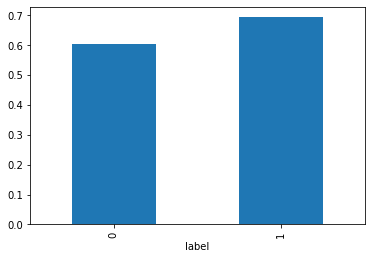

In [150]:
train_data.groupby('label')['sif_embedding'].mean().plot(kind='bar')

In [151]:
train_data.groupby('label').agg({
    'mean_pooing': ['mean'],
    'max_pooing': ['mean'],
    'tfidf_pooing': ['mean'],
    'sif_embedding': ['mean']
})

,mean_pooing,max_pooing,tfidf_pooing,sif_embedding
,mean,mean,mean,mean
label,,,,
0,0.824265,0.910736,0.720056,0.604179
1,0.856910,0.921142,0.781910,0.693707


In [6]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [7]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_sentence1+train_sentence2)]
model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=-1)

In [20]:
inferred = model.infer_vector(train_sentence1[7])

In [24]:
train_sentence2[7]

['我', '是', '问用', '蚂蚁', '花', '呗', '，', '为什么', '买', '不了', '火车票']

In [26]:
model.docvecs.most_similar(inferred)

<ipython-input-26-93154884f38c>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.most_similar(inferred)


[(12639, 0.41941237449645996),
 (16129, 0.409142404794693),
 (3735, 0.3955801725387573),
 (14811, 0.3915851414203644),
 (10814, 0.3698313236236572),
 (30686, 0.36248329281806946),
 (27914, 0.361524760723114),
 (10134, 0.3608473539352417),
 (21955, 0.353965163230896),
 (11773, 0.34876561164855957)]

In [27]:
train_sentence1_doc2feat = [model.infer_vector(x) for x in train_sentence1]
train_sentence2_doc2feat = [model.infer_vector(x) for x in train_sentence2]

In [28]:
train_sentence1_doc2feat = np.vstack(train_sentence1_doc2feat)
train_sentence2_doc2feat = np.vstack(train_sentence2_doc2feat)

train_sentence1_doc2feat = normalize(train_sentence1_doc2feat)
train_sentence2_doc2feat = normalize(train_sentence2_doc2feat)

doc2vec_distance = [np.dot(x, y) for x, y in 
                        zip(train_sentence1_doc2feat, train_sentence2_doc2feat)]
train_data['doc2vec'] = doc2vec_distance

NameError: name 'normalize' is not defined

In [ ]:
train_data['doc2vec']

In [200]:
train_data.groupby('label').agg({
    'mean_pooing': ['mean'],
    'max_pooing': ['mean'],
    'tfidf_pooing': ['mean'],
    'sif_embedding': ['mean'],
    'doc2vec': ['mean']
})

,mean_pooing,max_pooing,tfidf_pooing,sif_embedding,doc2vec
,mean,mean,mean,mean,mean
label,,,,,
0,0.824265,0.910736,0.720056,0.604179,1.087763e-07
1,0.856910,0.921142,0.781910,0.693707,-1.096150e-04


# 序列模型

In [29]:
import torch
from torch import nn

## RNN

https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN

In [ ]:
# input_size, hidden_size, num_layers
model = nn.RNN(10, 20, 2)

# sequence length, batch size, input_size
input = torch.randn(10, 1, 10)

output, hn = model(input)

In [206]:
output.shape, hn.shape

(torch.Size([10, 1, 20]), torch.Size([2, 1, 20]))

## LSTM

https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM

In [166]:
# input_size, hidden_size, num_layers
model = nn.LSTM(10, 20, 2)
input = torch.randn(5, 3, 10)

output, (hn, cn) = model(input)

In [167]:
output.shape, hn.shape, cn.shape

(torch.Size([5, 3, 20]), torch.Size([2, 3, 20]), torch.Size([2, 3, 20]))